In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# load input data
df1=pd.read_csv('input_data.csv', index_col=0)

In [3]:
df1.head()

,CL,Bakken,MID,LLS,Bakken.1,MID.1,LLS.1,1&2,1&3,1&4,...,2&12 (t-49),3&4 (t-49),3&5 (t-49),3&6 (t-49),3&7 (t-49),3&8 (t-49),3&9 (t-49),3&10 (t-49),3&11 (t-49),3&12 (t-49)
49,97.18,102.64,97.13,111.14,-5.46,0.05,-13.96,-0.80,-1.40,-1.95,...,-2.40,-0.58,-0.99,-1.31,-1.51,-1.63,-1.70,-1.75,-1.78,-1.69
50,97.98,103.46,97.86,112.95,-5.48,0.12,-14.97,-0.97,-1.60,-2.17,...,-3.33,-0.75,-1.31,-1.74,-2.01,-2.19,-2.30,-2.39,-2.47,-2.43
51,101.42,106.76,101.09,117.20,-5.34,0.33,-15.78,-0.97,-1.64,-2.18,...,-3.80,-0.84,-1.48,-1.99,-2.32,-2.53,-2.66,-2.76,-2.85,-2.83
52,101.07,106.42,100.99,116.80,-5.35,0.08,-15.73,-0.78,-1.37,-1.88,...,-4.55,-0.94,-1.64,-2.19,-2.56,-2.82,-3.02,-3.19,-3.35,-3.40
53,102.33,107.46,101.96,117.56,-5.13,0.37,-15.23,-0.76,-1.39,-1.95,...,-3.90,-0.81,-1.42,-1.90,-2.23,-2.47,-2.65,-2.79,-2.92,-2.95


In [4]:
# load inventory data
df2=pd.read_csv('inventory_data.csv', index_col=0)

In [5]:
df2.head()

,Inventory,Inventory (t-1),Inventory (t-7),Inventory (t-13),Inventory (t-19),Inventory (t-25),Inventory (t-31),Inventory (t-37),Inventory (t-43),Inventory (t-49)
49,40020,40020.0,40263.0,37440.0,37657.0,37407.0,38334.0,36805.0,37376.0,37493.0
50,40020,40020.0,40263.0,38570.0,37657.0,37407.0,38334.0,37667.0,37376.0,37493.0
51,40020,40020.0,40263.0,38570.0,37657.0,37407.0,38334.0,37667.0,37376.0,37493.0
52,40197,40020.0,40263.0,38570.0,37440.0,37407.0,38334.0,37667.0,36805.0,37493.0
53,40197,40197.0,40263.0,38570.0,37440.0,37657.0,38334.0,37667.0,36805.0,37376.0


CL             0.609752
Bakken         0.554302
MID            0.542692
LLS            0.565142
Bakken.1       0.405856
                 ...   
3&8 (t-49)     0.686312
3&9 (t-49)     0.685143
3&10 (t-49)    0.684372
3&11 (t-49)    0.684200
3&12 (t-49)    0.684819
Length: 1850, dtype: float64


<AxesSubplot:>

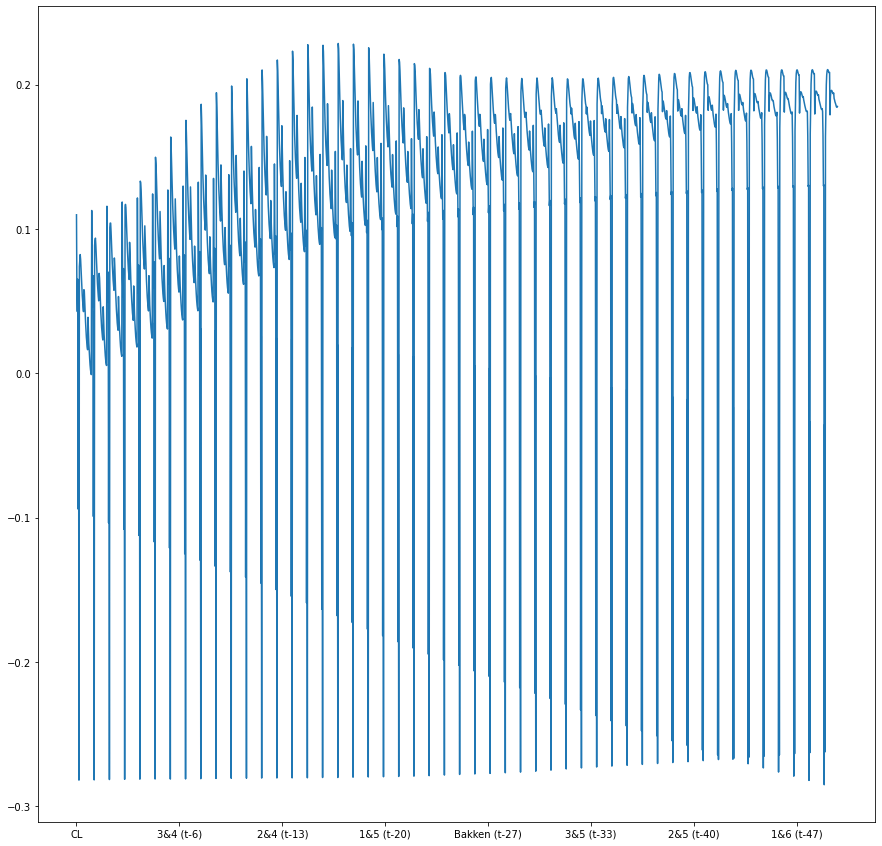

In [21]:
#calulating Correlation of "inventory" with other features. 
corr_inventory=df1.corrwith(df2['Inventory'],method='pearson').abs()
print(corr_inventory)
plt.figure(figsize=(15,15))
m_corr_inventory = corr_inventory - 0.5
m_corr_inventory.plot()


# sns.heatmap(corr_inventory, annot=True, cmap=plt.cm.Reds)
# plt.show()

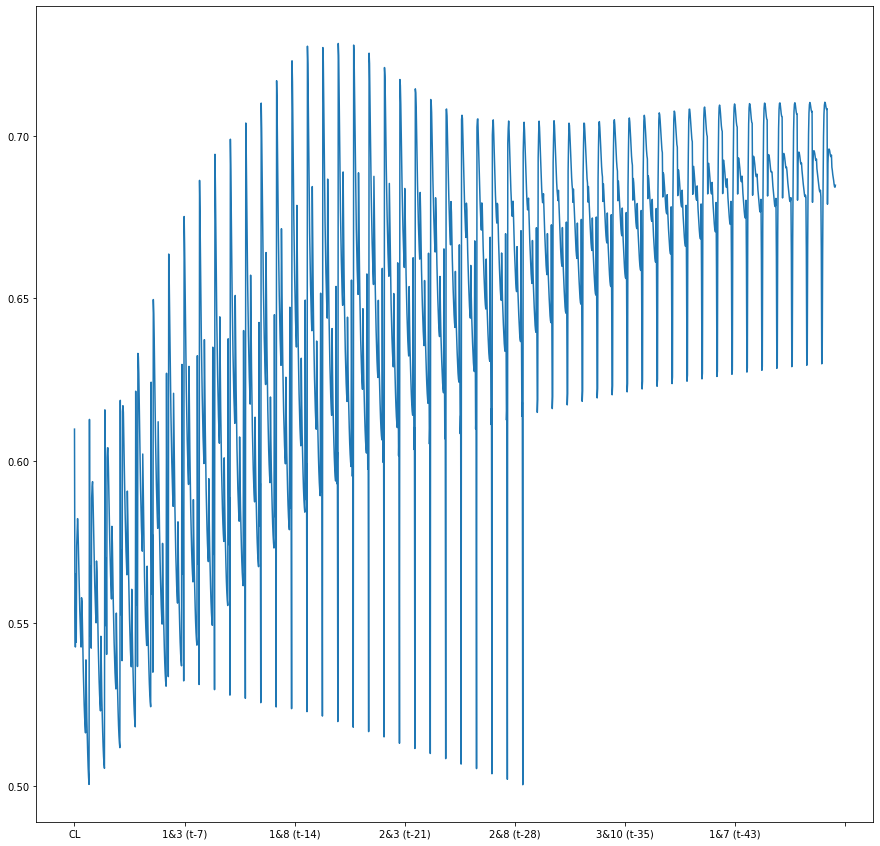

In [22]:
#Selecting highly correlated features
relevant_features = corr_inventory[corr_inventory>0.5]
relevant_features
plt.figure(figsize=(15,15))
relevant_features.plot();

In [23]:
selected_df = df1[relevant_features.index]  # Only getting columns having corr> 0.5 wrt output
selected_df.reindex(df1.index)


,CL,Bakken,MID,LLS,MID.1,1&2,1&3,1&4,1&5,1&6,...,2&12 (t-49),3&4 (t-49),3&5 (t-49),3&6 (t-49),3&7 (t-49),3&8 (t-49),3&9 (t-49),3&10 (t-49),3&11 (t-49),3&12 (t-49)
49,97.18,102.64,97.13,111.14,0.05,-0.80,-1.40,-1.95,-2.30,-2.56,...,-2.40,-0.58,-0.99,-1.31,-1.51,-1.63,-1.70,-1.75,-1.78,-1.69
50,97.98,103.46,97.86,112.95,0.12,-0.97,-1.60,-2.17,-2.57,-2.85,...,-3.33,-0.75,-1.31,-1.74,-2.01,-2.19,-2.30,-2.39,-2.47,-2.43
51,101.42,106.76,101.09,117.20,0.33,-0.97,-1.64,-2.18,-2.52,-2.75,...,-3.80,-0.84,-1.48,-1.99,-2.32,-2.53,-2.66,-2.76,-2.85,-2.83
52,101.07,106.42,100.99,116.80,0.08,-0.78,-1.37,-1.88,-2.19,-2.42,...,-4.55,-0.94,-1.64,-2.19,-2.56,-2.82,-3.02,-3.19,-3.35,-3.40
53,102.33,107.46,101.96,117.56,0.37,-0.76,-1.39,-1.95,-2.28,-2.53,...,-3.90,-0.81,-1.42,-1.90,-2.23,-2.47,-2.65,-2.79,-2.92,-2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,22.41,19.06,19.16,21.46,3.25,-6.85,-10.55,-12.01,-12.65,-13.12,...,1.20,-0.03,0.03,0.18,0.38,0.60,0.79,0.97,1.14,1.29
2318,20.11,17.71,18.11,20.66,2.00,-7.29,-11.76,-13.54,-14.45,-15.07,...,0.36,-0.13,-0.15,-0.08,0.05,0.17,0.27,0.37,0.46,0.53
2319,19.87,18.41,18.92,20.87,0.95,-6.17,-10.09,-11.62,-12.46,-13.02,...,0.04,-0.18,-0.27,-0.25,-0.16,-0.05,0.04,0.11,0.19,0.25
2320,19.87,17.94,19.17,21.87,0.70,-5.66,-9.68,-11.22,-12.07,-12.65,...,0.30,-0.18,-0.26,-0.23,-0.13,0.01,0.14,0.27,0.40,0.51


In [24]:
selected_df

,CL,Bakken,MID,LLS,MID.1,1&2,1&3,1&4,1&5,1&6,...,2&12 (t-49),3&4 (t-49),3&5 (t-49),3&6 (t-49),3&7 (t-49),3&8 (t-49),3&9 (t-49),3&10 (t-49),3&11 (t-49),3&12 (t-49)
49,97.18,102.64,97.13,111.14,0.05,-0.80,-1.40,-1.95,-2.30,-2.56,...,-2.40,-0.58,-0.99,-1.31,-1.51,-1.63,-1.70,-1.75,-1.78,-1.69
50,97.98,103.46,97.86,112.95,0.12,-0.97,-1.60,-2.17,-2.57,-2.85,...,-3.33,-0.75,-1.31,-1.74,-2.01,-2.19,-2.30,-2.39,-2.47,-2.43
51,101.42,106.76,101.09,117.20,0.33,-0.97,-1.64,-2.18,-2.52,-2.75,...,-3.80,-0.84,-1.48,-1.99,-2.32,-2.53,-2.66,-2.76,-2.85,-2.83
52,101.07,106.42,100.99,116.80,0.08,-0.78,-1.37,-1.88,-2.19,-2.42,...,-4.55,-0.94,-1.64,-2.19,-2.56,-2.82,-3.02,-3.19,-3.35,-3.40
53,102.33,107.46,101.96,117.56,0.37,-0.76,-1.39,-1.95,-2.28,-2.53,...,-3.90,-0.81,-1.42,-1.90,-2.23,-2.47,-2.65,-2.79,-2.92,-2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,22.41,19.06,19.16,21.46,3.25,-6.85,-10.55,-12.01,-12.65,-13.12,...,1.20,-0.03,0.03,0.18,0.38,0.60,0.79,0.97,1.14,1.29
2318,20.11,17.71,18.11,20.66,2.00,-7.29,-11.76,-13.54,-14.45,-15.07,...,0.36,-0.13,-0.15,-0.08,0.05,0.17,0.27,0.37,0.46,0.53
2319,19.87,18.41,18.92,20.87,0.95,-6.17,-10.09,-11.62,-12.46,-13.02,...,0.04,-0.18,-0.27,-0.25,-0.16,-0.05,0.04,0.11,0.19,0.25
2320,19.87,17.94,19.17,21.87,0.70,-5.66,-9.68,-11.22,-12.07,-12.65,...,0.30,-0.18,-0.26,-0.23,-0.13,0.01,0.14,0.27,0.40,0.51


In [25]:
merged_df = df2.merge(selected_df, left_index=True, right_index=True)
merged_df.index.names = ['Inventory_index']
merged_df.reset_index(level=0, inplace=True)
merged_df

,Inventory_index,Inventory,Inventory (t-1),Inventory (t-7),Inventory (t-13),Inventory (t-19),Inventory (t-25),Inventory (t-31),Inventory (t-37),Inventory (t-43),...,2&12 (t-49),3&4 (t-49),3&5 (t-49),3&6 (t-49),3&7 (t-49),3&8 (t-49),3&9 (t-49),3&10 (t-49),3&11 (t-49),3&12 (t-49)
0,49,40020,40020.0,40263.0,37440.0,37657.0,37407.0,38334.0,36805.0,37376.0,...,-2.40,-0.58,-0.99,-1.31,-1.51,-1.63,-1.70,-1.75,-1.78,-1.69
1,50,40020,40020.0,40263.0,38570.0,37657.0,37407.0,38334.0,37667.0,37376.0,...,-3.33,-0.75,-1.31,-1.74,-2.01,-2.19,-2.30,-2.39,-2.47,-2.43
2,51,40020,40020.0,40263.0,38570.0,37657.0,37407.0,38334.0,37667.0,37376.0,...,-3.80,-0.84,-1.48,-1.99,-2.32,-2.53,-2.66,-2.76,-2.85,-2.83
3,52,40197,40020.0,40263.0,38570.0,37440.0,37407.0,38334.0,37667.0,36805.0,...,-4.55,-0.94,-1.64,-2.19,-2.56,-2.82,-3.02,-3.19,-3.35,-3.40
4,53,40197,40197.0,40263.0,38570.0,37440.0,37657.0,38334.0,37667.0,36805.0,...,-3.90,-0.81,-1.42,-1.90,-2.23,-2.47,-2.65,-2.79,-2.92,-2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,2317,54965,49241.0,42824.0,39303.0,38445.0,37882.0,39149.0,38243.0,38376.0,...,1.20,-0.03,0.03,0.18,0.38,0.60,0.79,0.97,1.14,1.29
2269,2318,54965,54965.0,42824.0,39303.0,38445.0,37882.0,37178.0,38243.0,38376.0,...,0.36,-0.13,-0.15,-0.08,0.05,0.17,0.27,0.37,0.46,0.53
2270,2319,54965,54965.0,49241.0,39303.0,38445.0,37882.0,37178.0,39149.0,38376.0,...,0.04,-0.18,-0.27,-0.25,-0.16,-0.05,0.04,0.11,0.19,0.25
2271,2320,54965,54965.0,49241.0,42824.0,38445.0,37882.0,37178.0,39149.0,38376.0,...,0.30,-0.18,-0.26,-0.23,-0.13,0.01,0.14,0.27,0.40,0.51


In [26]:
merged_df.to_csv("selected features.csv", index = False)

In [29]:
print(merged_df [[ "CL", "Bakken"]]. corr ()) 
print(merged_df [[ "Bakken", "1&2"]]. corr ()) 

              CL    Bakken
CL      1.000000  0.981716
Bakken  0.981716  1.000000
          Bakken       1&2
Bakken  1.000000  0.455006
1&2     0.455006  1.000000
